# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

## CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [397]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Business Objectives
#### Background
The client is a used car dealership, an organization involved with the purchasing and reselling of used cars from and to customers.

#### Business Objectives
Based on the available dataset, we want to determine what factors play the most significant role in determining the price that a customer is willing to pay for a given used car. In doing so, we hope to answer the question "What factors should we focus on in regards to car inventory acquisition in order to improve revenue from used car sells?"

#### Business Success Criteria
Taking the provided dataset as the current state of car inventory, business success criteria here can be described as "if we were to focus on increasing inventory based on factors deemed most important to price, we should expect an increase in revenue performance". That is, success of this analysis would be actionable insights that allow the client to make changes to their inventory strategy and ultimately lead to an improvement in used car sales.

### Situation Assessment
#### Inventory of Resources
Resources available for this analysis are quite limited. No personnel are available for feedback, and have only one iteration of static data available for analysis.

Further, only one local computer is available, significantly limiting the amount of computational resources available. 

#### Requirements, Assumptions, and Constraints
In regards to resources, one of the major constraints is the limit of time. For this project, we have slightly under one week of time available, with the actual man-hours availible as a small fraction of this time period due to other previously agreed to committments to other engagements. As such, we will need to be very conservative in our choice of features to examine and in the time committed to model training. With this in mind, we should view this initial cycle of analysis as an MVP meant for the purpose of initial strategy assessment, with further cycles focusing more in-depth on identified key factors and allocating more time and resources as necessary.

In regards to the dataset available, we make the assumption that the data provided is sufficiently recent enough to provide an accurate image of the current state of inventory and its performance. Further, while the data entry process is unkown, we assume that minimal faulty data has been entered such that the data can be confidently relied on for accurate analysis.

We assume that the client maintains the legal rights to the dataset provided and that we are free to use it for any internally facing (eg. used/viewed only by the client for strategy reassessment) purposes.

#### Risks and Contingencies
|                 **Risk**                |                                                                                                                                                              **Contingency**                                                                                                                                                             |
|:---------------------------------------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| A significant amount of data is invalid | Given that we are working with a dataset of over 400K cars the risk of this is low, however if this proves to be the case we will need to make a note of the reliability of the produced model and follow up in future cycles with better data.                                                                                          |
| Model chosen is suboptimal              | Given current limitations on available time, resources, and knowledge of regression models, there is a significant risk that the model chosen for evaluation will not be the best possible model available. The best way to handle this is to make note of model performance while making suggestions for future avenues of improvement. |
| Incorrect understanding of dataset      | Given that no feedback is available during the analysis cycle, there is a risk that data in the dataset may be incorrectly interpreted. Contingency for this is to spend sufficient time developing an understanding of the dataset and to go over understanding of data with client during the review phase.                            |

#### Costs and Benefits
While the current revenue of the client is currently unclear at this stage, given that the dataset provided for analysis has over 400K cars and the original dataset had over 3 million cars, it is not unreasonable to assume a significant benefit from this initial analysis.

For example, [using the following article as a base of reference](https://www.sapling.com/12129768/much-money-average-used-car-dealership-make-year), if we were to assume annual sales of cars total about \\$3,900,000, a conservative number given the age of the data referenced in the article, and thus about \\$325,000/month, a 5% improvement in sales would result in revenue of \\$341,250/month, or an increase of \\$16,250/month. This more than justifies the cost of a rough initial analysis.

### Data Mining Goals
Deliverables for this project include a notebook with all aspects of the CRISP-DM framework such as data cleaning, model training, and evaluation. Additionally, a README will be included summarizing findings in an easy to read format for non-technical consumers of this analysis.

The data will be made available via a Github Repo.

#### Data Mining Success Criteria
Key factors relating to used cars have been identified such that next steps relating to inventory strategy can be made.

### Project Plan
The first stage of this project involves an assessment of the dataset available. Given that we have a fixed timeline and no opportunity for follow-up during the current cycle, we will have to make due with whatever data is made available, making note of any issues as a point of follow-up for future analysis cycles in the initial data reports.

The next step is preparing our data for modeling. This involves cleaning the data, removing and creating any features as necesssary, and a report summarizing what steps have been taken to clean the data for future replication.

We will then perform an initial pass on model training, which, after evaluation of the trained model, may result in further passes to improve performance. Iterations here will likely be limited given the time constrains of the current cycle.

After modeling and evaluation, a summary of the work performed will be created along with key insights and next step recommendations.

## Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Initial Data Collection
- Dataset: "vehicles.csv"
- Location: data/vehicles.csv
- Acquisition: Provided by client

In [2]:
df = pd.read_csv('data/vehicles.csv')

### Data Description
Examine collected data at a high level to gain an initial understanding of what kind of dataset is being utilized.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


#### Inital Impressions
Initial analysis reveals that the majority of features included as part of data are categorical. That is, values are within a predefined set of values. The features will need further encoding before they can be used for model training purposes.

Beyond these categorical features are four features with numerical values, **"id", "price", "year", and "odometer"**. **"id"** can be safely removed as it duplicates the function of the default index value with no added benefit. **"price"** is the dependent value and will need to be removed from the training data. **"year** and **odometer** are likely to serve as good features for model training.

#### Unclear Features
Initial examination of features leads to the conclusion that the provided features and their data are clear enough to understand what purpose they serve. More in-depth examination of data included per feature is required to see if there are any unusual/unclear values.

#### Missing Values
A number of features include missing values, with **"size"** missing the most with only 120,519/426,880, or approximately only 28% of registered cars including data. How to handle this missing data will require further investigation in order to answer questions such as "why is this data missing", "what are common values for this missing data", and "can data be manipulated to fill in these missing values". 

While it is advantageous to preserve as many data samples as possible, reducing to the minimum fully registered dataset of 120,519 would still represent a significant number of samples to train a model from, and as such leaves the initial impression that there is minimal risk of insufficient significant data.

### Data Exploration
#### Exploration of Available Values
##### Region

In [23]:
df.region.value_counts()

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64

While the region for a given car is likely to have an impact on the price, this is not a feature that the client would be able to have any control over. As such, for the purpose of reducing data complexity, this feature can be dropped.

##### Manufacturer

In [8]:
df.manufacturer.value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


In [20]:
# Manufacturers that represent at least 2% of the total dataset
manufacturer_group = df.groupby('manufacturer').manufacturer.count()
manufacturer_group[manufacturer_group > (df.shape[0] * 0.02)].sort_values(ascending = False)

manufacturer
ford             70985
chevrolet        55064
toyota           34202
honda            21269
nissan           19067
jeep             19014
ram              18342
gmc              16785
bmw              14699
dodge            13707
mercedes-benz    11817
hyundai          10338
subaru            9495
volkswagen        9345
Name: manufacturer, dtype: int64

In [22]:
# Total cars represented by manufacturers exceeding %2 of total dataset
manufacturer_group.values.sum()

409234

Let's limit analysis to cars within these manufacturers in order to reduce noise from cars that are not significantly represented in the dataset. Further exploration should be limited to only cars that exceed the 2% representation threshold.

In [26]:
manufacturer_list = manufacturer_group[manufacturer_group > (df.shape[0] * 0.02)].index.to_list()
manufacturer_list

['bmw',
 'chevrolet',
 'dodge',
 'ford',
 'gmc',
 'honda',
 'hyundai',
 'jeep',
 'mercedes-benz',
 'nissan',
 'ram',
 'subaru',
 'toyota',
 'volkswagen']

In [28]:
manufacturer_filtered_df = df.query('manufacturer in @manufacturer_list')
manufacturer_filtered_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al


In [29]:
manufacturer_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324129 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            324129 non-null  int64  
 1   region        324129 non-null  object 
 2   price         324129 non-null  int64  
 3   year          324129 non-null  float64
 4   manufacturer  324129 non-null  object 
 5   model         319996 non-null  object 
 6   condition     184695 non-null  object 
 7   cylinders     194211 non-null  object 
 8   fuel          321977 non-null  object 
 9   odometer      320658 non-null  float64
 10  title_status  318001 non-null  object 
 11  transmission  322195 non-null  object 
 12  VIN           200233 non-null  object 
 13  drive         231885 non-null  object 
 14  size          93923 non-null   object 
 15  type          252569 non-null  object 
 16  paint_color   225887 non-null  object 
 17  state         324129 non-null  object 
dtypes: 

##### Model

In [36]:
manufacturer_filtered_df.model.value_counts()[:100]

f-150                        8009
silverado 1500               5140
1500                         4210
camry                        3135
silverado                    3021
                             ... 
focus se                      552
tiguan                        549
wrangler unlimited sahara     534
camry le                      526
f350                          521
Name: model, Length: 100, dtype: int64

Looking at the Top 100 models included as part of this dataset indicates that each model represented includes at least 500 samples for reference. While some of these values are clearly duplicates that will need to be merged as part of data preperation, limiting to these values would help reduce the amount of data used for analysis while still maintaining a significant representation of each model included for model level analysis if desired.

In [41]:
top_100_models_list = manufacturer_filtered_df.model.value_counts()[:100].index.to_list()
top_100_models_list

['f-150',
 'silverado 1500',
 '1500',
 'camry',
 'silverado',
 'accord',
 'wrangler',
 'civic',
 'altima',
 'escape',
 '2500',
 'tacoma',
 'explorer',
 'grand cherokee',
 'corolla',
 'mustang',
 'fusion',
 'equinox',
 'cr-v',
 'focus',
 'malibu',
 'tahoe',
 'charger',
 'corvette',
 'rav4',
 'sonata',
 'impala',
 'sierra 1500',
 'grand caravan',
 'cruze',
 'outback',
 'silverado 2500hd',
 'f-250',
 'elantra',
 'odyssey',
 '3500',
 'edge',
 'prius',
 'tundra',
 'jetta',
 'rogue',
 'forester',
 'sentra',
 'sierra',
 'wrangler unlimited',
 'camaro',
 'pilot',
 'c-class',
 'sienna',
 'f-350',
 'f150',
 'cherokee',
 '4runner',
 'highlander',
 'suburban',
 'expedition',
 'traverse',
 'impreza',
 'challenger',
 'acadia',
 '3 series',
 'sierra 2500hd',
 'e-class',
 'yukon',
 'x5',
 'santa fe',
 'taurus',
 'ranger',
 'terrain',
 'colorado',
 'durango',
 'f250',
 'journey',
 'passat',
 'maxima',
 'pathfinder',
 'liberty',
 'versa',
 'murano',
 '5 series',
 'patriot',
 'fusion se',
 'legacy',
 'co

In [42]:
top_100_models_df = manufacturer_filtered_df.query('model in @top_100_models_list')
top_100_models_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
34,7316285779,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,NaN,4wd,NaN,truck,grey,al
37,7316130053,auburn,4500,1992.0,jeep,cherokee,excellent,6 cylinders,gas,192000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,al
38,7315816316,auburn,32990,2017.0,jeep,wrangler unlimited sport,good,6 cylinders,gas,30041.0,clean,other,1C4BJWDG5HL705371,4wd,NaN,other,silver,al
39,7315770394,auburn,24590,2017.0,chevrolet,silverado 1500 regular,good,6 cylinders,gas,40784.0,clean,other,1GCNCNEH7HZ118773,NaN,NaN,pickup,white,al


In [43]:
top_100_models_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141742 entries, 28 to 426856
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            141742 non-null  int64  
 1   region        141742 non-null  object 
 2   price         141742 non-null  int64  
 3   year          141742 non-null  float64
 4   manufacturer  141742 non-null  object 
 5   model         141742 non-null  object 
 6   condition     65407 non-null   object 
 7   cylinders     80161 non-null   object 
 8   fuel          141121 non-null  object 
 9   odometer      139644 non-null  float64
 10  title_status  140586 non-null  object 
 11  transmission  140459 non-null  object 
 12  VIN           84532 non-null   object 
 13  drive         104212 non-null  object 
 14  size          44426 non-null   object 
 15  type          107153 non-null  object 
 16  paint_color   97130 non-null   object 
 17  state         141742 non-null  object 
dtypes: 

##### Condition

In [45]:
top_100_models_df.condition.value_counts()

excellent    35734
good         20550
like new      6288
fair          2301
new            331
salvage        203
Name: condition, dtype: int64

##### Cylinders

In [46]:
top_100_models_df.cylinders.value_counts()

4 cylinders     29255
6 cylinders     27767
8 cylinders     22141
5 cylinders       390
10 cylinders      279
other             246
3 cylinders        79
12 cylinders        4
Name: cylinders, dtype: int64

Cars with a cylinder number outside of 4, 6, 8 represent an unusual car. As such, for the purposes of modeling it is better to filter these cars out as the price to car regression is likely to be significantly different from standard cars.

In [47]:
normal_cylinders_list = ['4 cylinders', '6 cylinders', '8 cylinders']
normal_cylinders_df = top_100_models_df.query('cylinders in @normal_cylinders_list')
normal_cylinders_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
34,7316285779,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,NaN,4wd,NaN,truck,grey,al
37,7316130053,auburn,4500,1992.0,jeep,cherokee,excellent,6 cylinders,gas,192000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,al
38,7315816316,auburn,32990,2017.0,jeep,wrangler unlimited sport,good,6 cylinders,gas,30041.0,clean,other,1C4BJWDG5HL705371,4wd,NaN,other,silver,al
39,7315770394,auburn,24590,2017.0,chevrolet,silverado 1500 regular,good,6 cylinders,gas,40784.0,clean,other,1GCNCNEH7HZ118773,NaN,NaN,pickup,white,al


In [48]:
normal_cylinders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79163 entries, 28 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            79163 non-null  int64  
 1   region        79163 non-null  object 
 2   price         79163 non-null  int64  
 3   year          79163 non-null  float64
 4   manufacturer  79163 non-null  object 
 5   model         79163 non-null  object 
 6   condition     51064 non-null  object 
 7   cylinders     79163 non-null  object 
 8   fuel          78976 non-null  object 
 9   odometer      78604 non-null  float64
 10  title_status  78553 non-null  object 
 11  transmission  79073 non-null  object 
 12  VIN           43925 non-null  object 
 13  drive         72098 non-null  object 
 14  size          38234 non-null  object 
 15  type          70180 non-null  object 
 16  paint_color   65028 non-null  object 
 17  state         79163 non-null  object 
dtypes: float64(2), int64(2),

##### Fuel

In [49]:
normal_cylinders_df.fuel.value_counts()

gas         72688
diesel       4484
hybrid        934
other         866
electric        4
Name: fuel, dtype: int64

The majority of cars are of the **"gas"** fuel type. While it could also be argued that **"diesel"** represents a significant amount of sample data, given the current time constraint limits and the fact that analyizing a separate fuel type would jusitfy separate modeling, for the purposes of the initial cycle of analysis data will be limited to only the **"gas"** type.

In [50]:
gas_df = normal_cylinders_df[normal_cylinders_df['fuel'] == 'gas']
gas_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
34,7316285779,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,NaN,4wd,NaN,truck,grey,al
37,7316130053,auburn,4500,1992.0,jeep,cherokee,excellent,6 cylinders,gas,192000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,al
38,7315816316,auburn,32990,2017.0,jeep,wrangler unlimited sport,good,6 cylinders,gas,30041.0,clean,other,1C4BJWDG5HL705371,4wd,NaN,other,silver,al
39,7315770394,auburn,24590,2017.0,chevrolet,silverado 1500 regular,good,6 cylinders,gas,40784.0,clean,other,1GCNCNEH7HZ118773,NaN,NaN,pickup,white,al


In [51]:
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72688 entries, 28 to 426813
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            72688 non-null  int64  
 1   region        72688 non-null  object 
 2   price         72688 non-null  int64  
 3   year          72688 non-null  float64
 4   manufacturer  72688 non-null  object 
 5   model         72688 non-null  object 
 6   condition     47180 non-null  object 
 7   cylinders     72688 non-null  object 
 8   fuel          72688 non-null  object 
 9   odometer      72148 non-null  float64
 10  title_status  72170 non-null  object 
 11  transmission  72601 non-null  object 
 12  VIN           39622 non-null  object 
 13  drive         65970 non-null  object 
 14  size          35524 non-null  object 
 15  type          64467 non-null  object 
 16  paint_color   60269 non-null  object 
 17  state         72688 non-null  object 
dtypes: float64(2), int64(2),

##### Title Status

In [52]:
gas_df.title_status.value_counts()

clean         69042
rebuilt        1731
salvage         932
lien            376
missing          63
parts only       26
Name: title_status, dtype: int64

While there is merit in exploring cars with different title statuses, this would justify separate modeling as the value assessed to a given car would likely be significantly different. As such, given the current time constraints, this analysis will focus on cars with only **"clean"** status

In [53]:
clean_title_df = gas_df[gas_df['title_status'] == 'clean']
clean_title_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
34,7316285779,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,NaN,4wd,NaN,truck,grey,al
37,7316130053,auburn,4500,1992.0,jeep,cherokee,excellent,6 cylinders,gas,192000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,al
38,7315816316,auburn,32990,2017.0,jeep,wrangler unlimited sport,good,6 cylinders,gas,30041.0,clean,other,1C4BJWDG5HL705371,4wd,NaN,other,silver,al
39,7315770394,auburn,24590,2017.0,chevrolet,silverado 1500 regular,good,6 cylinders,gas,40784.0,clean,other,1GCNCNEH7HZ118773,NaN,NaN,pickup,white,al


In [54]:
clean_title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69042 entries, 28 to 426813
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            69042 non-null  int64  
 1   region        69042 non-null  object 
 2   price         69042 non-null  int64  
 3   year          69042 non-null  float64
 4   manufacturer  69042 non-null  object 
 5   model         69042 non-null  object 
 6   condition     44314 non-null  object 
 7   cylinders     69042 non-null  object 
 8   fuel          69042 non-null  object 
 9   odometer      68502 non-null  float64
 10  title_status  69042 non-null  object 
 11  transmission  68955 non-null  object 
 12  VIN           38267 non-null  object 
 13  drive         62922 non-null  object 
 14  size          33726 non-null  object 
 15  type          61349 non-null  object 
 16  paint_color   57301 non-null  object 
 17  state         69042 non-null  object 
dtypes: float64(2), int64(2),

##### Transimission

In [55]:
clean_title_df.transmission.value_counts()

automatic    62459
manual        3994
other         2502
Name: transmission, dtype: int64

Following the same line of reasoning as previous features, analysis will focus on **"automatic"** cars to reduce the need for separate modeling.

In [56]:
automatic_transmission_df = clean_title_df[clean_title_df['transmission'] == 'automatic']
automatic_transmission_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
34,7316285779,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,NaN,4wd,NaN,truck,grey,al
37,7316130053,auburn,4500,1992.0,jeep,cherokee,excellent,6 cylinders,gas,192000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,al
59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,NaN,fwd,full-size,mini-van,silver,al
95,7309798041,auburn,2100,2006.0,subaru,impreza,fair,4 cylinders,gas,97000.0,clean,automatic,NaN,NaN,NaN,hatchback,NaN,al
170,7316874816,birmingham,13950,2011.0,toyota,tacoma,good,4 cylinders,gas,151060.0,clean,automatic,NaN,rwd,NaN,truck,silver,al


In [57]:
automatic_transmission_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62459 entries, 34 to 426813
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            62459 non-null  int64  
 1   region        62459 non-null  object 
 2   price         62459 non-null  int64  
 3   year          62459 non-null  float64
 4   manufacturer  62459 non-null  object 
 5   model         62459 non-null  object 
 6   condition     39649 non-null  object 
 7   cylinders     62459 non-null  object 
 8   fuel          62459 non-null  object 
 9   odometer      61947 non-null  float64
 10  title_status  62459 non-null  object 
 11  transmission  62459 non-null  object 
 12  VIN           34071 non-null  object 
 13  drive         57362 non-null  object 
 14  size          31595 non-null  object 
 15  type          55453 non-null  object 
 16  paint_color   51699 non-null  object 
 17  state         62459 non-null  object 
dtypes: float64(2), int64(2),

##### Drive

In [58]:
automatic_transmission_df.drive.value_counts()

4wd    27277
fwd    20734
rwd     9351
Name: drive, dtype: int64

The relationship of drive to price is unknown at this point in time. As such, the feature will be included as part of model training. As no best guess assumption can be made for samples with a missing drive field, the best course of action is to drop these samples from analysis.

##### Size

In [60]:
automatic_transmission_df['size'].value_counts()

full-size      16645
mid-size       11032
compact         3514
sub-compact      404
Name: size, dtype: int64

While there would be value in using size as part of further analysis, given that samples with a missing size value represent almost half of the remaining samples and no best guess assumption can be made about these missing values, it is better to drop this field for initial model training.

Future analysis cycles could benefit from examining cars with size values explicitly registered.

##### Type

In [63]:
automatic_transmission_df.type.value_counts()

SUV            17837
sedan          15861
truck           9871
pickup          4923
coupe           1975
wagon           1357
mini-van        1063
van              702
hatchback        587
other            571
convertible      557
offroad          147
bus                2
Name: type, dtype: int64

In an effort to reduce noise, cars who's type value count are less than 500 will be removed.

In [71]:
car_type_list = automatic_transmission_df.groupby('type')['type'].filter(lambda col: len(col) > 500).unique()
car_type_list

array(['truck', 'mini-van', 'hatchback', 'coupe', 'sedan', 'SUV',
       'pickup', 'other', 'wagon', 'van', 'convertible'], dtype=object)

In [72]:
car_type_df = automatic_transmission_df.query('type in @car_type_list')
car_type_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
34,7316285779,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,NaN,4wd,NaN,truck,grey,al
59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,NaN,fwd,full-size,mini-van,silver,al
95,7309798041,auburn,2100,2006.0,subaru,impreza,fair,4 cylinders,gas,97000.0,clean,automatic,NaN,NaN,NaN,hatchback,NaN,al
170,7316874816,birmingham,13950,2011.0,toyota,tacoma,good,4 cylinders,gas,151060.0,clean,automatic,NaN,rwd,NaN,truck,silver,al
187,7316846605,birmingham,4500,2008.0,ford,mustang,NaN,6 cylinders,gas,187016.0,clean,automatic,1ZVHT80N885207297,rwd,NaN,coupe,red,al


In [73]:
car_type_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55304 entries, 34 to 426784
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            55304 non-null  int64  
 1   region        55304 non-null  object 
 2   price         55304 non-null  int64  
 3   year          55304 non-null  float64
 4   manufacturer  55304 non-null  object 
 5   model         55304 non-null  object 
 6   condition     34147 non-null  object 
 7   cylinders     55304 non-null  object 
 8   fuel          55304 non-null  object 
 9   odometer      54868 non-null  float64
 10  title_status  55304 non-null  object 
 11  transmission  55304 non-null  object 
 12  VIN           32038 non-null  object 
 13  drive         52090 non-null  object 
 14  size          30772 non-null  object 
 15  type          55304 non-null  object 
 16  paint_color   47765 non-null  object 
 17  state         55304 non-null  object 
dtypes: float64(2), int64(2),

##### Paint Color

In [74]:
car_type_df.paint_color.value_counts()

white     10567
black      9005
silver     7313
grey       6267
blue       4954
red        4570
custom     2202
brown      1161
green      1133
yellow      276
orange      199
purple      118
Name: paint_color, dtype: int64

##### State

In [75]:
car_type_df.state.value_counts()

ca    5286
fl    3577
tx    3214
or    2482
nc    2422
ny    2382
oh    2307
mi    1723
va    1699
wi    1627
wa    1624
tn    1601
ia    1569
co    1564
pa    1471
nj    1431
il    1282
id    1269
mn    1202
mt    1140
ma    1028
az     955
ok     897
ga     886
ks     789
md     746
sc     737
ak     663
mo     630
al     623
ct     613
ky     588
in     586
nv     575
vt     514
ar     396
hi     339
nh     331
dc     320
nm     316
la     312
me     308
ne     249
ri     242
sd     211
ms     137
ut     125
de     114
wv      99
nd      54
wy      49
Name: state, dtype: int64

While the state for a given car is likely to have an impact on the price, this is not a feature that the client would be able to have any control over. As such, for the purpose of reducing data complexity, this feature can be dropped.

#### Summary of Exploration
Given time constraints for the current cycle of data analysis, data will be filtered on a number of features:
- Manufacturer: Manufacturers with over 2% representation in dataset
- Model: Top 100 models
- Cylinders: Cars with 4, 6, or 8 cylinders
- Fuel: Cars with "gas" type
- Title: Cars with "clean" status
- Transmission: Automatic
- Type: Cars with type count of over 500

##### Fields to Drop
Based on initial assessment there are a number of fields that have been deemed unneccessary for the initial cycle of analysis and as such will be dropped:
- id
- region
- VIN
- size
- state

Further, based on defining one value for the feature, the following fields can also be dropped:
- fuel
- title_status
- transmission

##### Fields with Missing Value Handling
After filtering based on the above, there are still a significant number of samples that contain fields with missing values. This includes the following fields:
- condition
- odometer
- drive
- paint_color

The most significant of these being **"condition"**, with a non-null value of 34,147. Given that this is likely a key feature in determining the price of a car and that no best guess assumption can be made for the non-null values, the course of action in this case is for rows with missing values to be dropped.

With the above data cleaning, the final data samples will end up being around 34,147/426,880, or approximately 8% of the initial dataset. While this may seem like a small value, the absolute value is still significantly large such that we should be able to interpret the results of any analysis performed as a reliable model for car price. 

Further, it should be noted that this sample set represents the most common types of cars represented. As such, this should provide us with a solid foundation for determining an appropriate strategy for increasing revenue on the majority of cars sold by the client.

## Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Drop unnecessary features, samples with missing values

In [168]:
dropped_features_df = car_type_df.drop([
    'id', 
    'region', 
    'VIN', 
    'size', 
    'state', 
    'fuel', 
    'title_status', 
    'transmission'
], axis = 1)
dropped_features_df.head()

,price,year,manufacturer,model,condition,cylinders,odometer,drive,type,paint_color
34,35000,2019.0,toyota,tacoma,excellent,6 cylinders,43000.0,4wd,truck,grey
59,14000,2012.0,honda,odyssey,excellent,6 cylinders,95000.0,fwd,mini-van,silver
95,2100,2006.0,subaru,impreza,fair,4 cylinders,97000.0,NaN,hatchback,NaN
170,13950,2011.0,toyota,tacoma,good,4 cylinders,151060.0,rwd,truck,silver
187,4500,2008.0,ford,mustang,NaN,6 cylinders,187016.0,rwd,coupe,red


In [169]:
no_missing_values_df = dropped_features_df.dropna()
no_missing_values_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28900 entries, 34 to 426784
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         28900 non-null  int64  
 1   year          28900 non-null  float64
 2   manufacturer  28900 non-null  object 
 3   model         28900 non-null  object 
 4   condition     28900 non-null  object 
 5   cylinders     28900 non-null  object 
 6   odometer      28900 non-null  float64
 7   drive         28900 non-null  object 
 8   type          28900 non-null  object 
 9   paint_color   28900 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.4+ MB


### Combine common "model" values

In [170]:
# Combine all F150 Cars
no_missing_values_df.loc[no_missing_values_df['model'] == 'f150', 'model'] = 'f-150'

# Combine all 1500 Cars
no_missing_values_df.loc[no_missing_values_df['model'] == 'silverado 1500', 'model'] = '1500'
no_missing_values_df.loc[no_missing_values_df['model'] == 'sierra 1500', 'model'] = '1500'
no_missing_values_df.loc[no_missing_values_df['model'] == 'sierra 1500', 'model'] = '1500'
no_missing_values_df.loc[no_missing_values_df['model'] == '1500 crew cab big horn', 'model'] = '1500'

# Combine all 2500 Cars
no_missing_values_df.loc[no_missing_values_df['model'] == 'silverado 2500hd', 'model'] = '2500'
no_missing_values_df.loc[no_missing_values_df['model'] == 'sierra 2500hd', 'model'] = '2500'

# Combine all F250 Cars
no_missing_values_df.loc[no_missing_values_df['model'] == 'f250', 'model'] = 'f-250'
no_missing_values_df.loc[no_missing_values_df['model'] == 'f250 super duty', 'model'] = 'f-250'
no_missing_values_df.loc[no_missing_values_df['model'] == 'f-250 super duty', 'model'] = 'f-250'

# Combine all F350 Cars
no_missing_values_df.loc[no_missing_values_df['model'] == 'f350', 'model'] = 'f-350'
no_missing_values_df.loc[no_missing_values_df['model'] == 'super duty f-350 srw', 'model'] = 'f-350'

### Remove cars with zero price value
During preprocessing setup it was discovered that samples exist where the price value is set to 0. This would appear to be faulty data, or suggest that these vehicles were given away for free. Either way, given that we want to examine cars that were sold we will remove these samples from the dataset.

Follow up investigation into why such samples exist is recommended.

In [171]:
no_free_cars_df = no_missing_values_df[no_missing_values_df['price'] != 0]
no_free_cars_df[no_free_cars_df['price'] == 0]

,price,year,manufacturer,model,condition,cylinders,odometer,drive,type,paint_color


### Preprocess Encoding and Transformation
#### Encoding
Given that categorical features are non-ordinal, One Hot Encoding will be used on all categorical features. Given the high number of categories in the **"model"** feature, there is a concern on the impact this feature will have on dimensional complexity.

The number of categories for this feature will be left unchanged for now but if a significant impact on processing time is observed the number of models included will be reduced.

#### Transformation
For the numerical features **"year"** and **"odometer"**, two transofrmations will be performed:
1. StandardScalar - This is to ensure that one feature doesn't heavily outweigh the other due to a larger variance in values.
2. PolynomialFeatures - To explore if higher order variations of these values act as a more effective predictor of price.

Hyperparameters for PolynomialFeatures and other model relevant handlers will be optimized as part of a Grid Search during the Modeling Phase. As such, only default values will be used at this stage, defining and confirming behavior for the base preprocessing pipeline.

In [266]:
# Use pipeline to perform multiple transformations on specific columns (see transformer below)
num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias = False))
])

transformer = make_column_transformer(
    (OneHotEncoder(), [
        'manufacturer', 
        'model', 
        'condition', 
        'cylinders', 
        'drive', 
        'type', 
        'paint_color'
    ]),
    (num_pipeline, ['year', 'odometer']),
    verbose_feature_names_out = False,
    remainder = 'passthrough',
    sparse_threshold = 0 # Due to current lack of knowledge of working with sparse matrices, dense matrix return will be enforced
)

In [211]:
no_model_transformer = make_column_transformer(
    (OneHotEncoder(), [
        'manufacturer', 
        'condition', 
        'cylinders', 
        'drive', 
        'type', 
        'paint_color'
    ]),
    (num_pipeline, ['year', 'odometer']),
    verbose_feature_names_out = False,
    remainder = 'passthrough',
    sparse_threshold = 0 # Due to current lack of knowledge of working with sparse matrices, dense matrix return will be enforced
)

In [236]:
only_model_transformer = make_column_transformer(
    (OneHotEncoder(), ['model']),
    verbose_feature_names_out = False,
    remainder = 'passthrough',
    sparse_threshold = 0 # Due to current lack of knowledge of working with sparse matrices, dense matrix return will be enforced
)

In [392]:
model_manufacturer_removed_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), [
        'condition', 
        'cylinders', 
        'drive', 
        'type', 
        'paint_color'
    ]),
    (num_pipeline, ['year', 'odometer']),
    verbose_feature_names_out = False,
    remainder = 'passthrough',
    sparse_threshold = 0 # Due to current lack of knowledge of working with sparse matrices, dense matrix return will be enforced
)

### Filter to Most Frequent Car Model
After examining a number regression models it has been observed that one of the greatest drivers of price is the type of car model. While this is an important point of discovery in and of itself, it would also be beneficial to examine what are other major drivers of price. As such, car model will be filtered to the most common car and then removed as a feature so that other features can be more closely examined.

In [264]:
only_1500_model_df = no_free_cars_df[no_free_cars_df['model'] == '1500'].drop(['manufacturer', 'model'], axis = 1)
only_1500_model_df.head()

,price,year,condition,cylinders,odometer,drive,type,paint_color
479,29950,2014.0,excellent,8 cylinders,139029.0,4wd,truck,black
734,37900,2020.0,like new,8 cylinders,5622.0,rwd,truck,white
1235,30900,2015.0,good,8 cylinders,114800.0,4wd,truck,custom
1236,24900,2015.0,good,8 cylinders,119569.0,rwd,truck,white
1322,29950,2014.0,excellent,8 cylinders,139029.0,4wd,truck,black


### Remove cars with price value of 1
After performing a scatter plot of price against year (during 10th modeling iteration), it was discovered that there are a few samples that have a price value of 1. While this was not a significant amount, with about 14 samples in the 1500 model dataset, removing these should reduce noise (and thus improve model performance).

Follow up investigation into why such samples exist is recommended.

In [320]:
only_1500_no_1_price_samples_df = only_1500_model_df[only_1500_model_df['price'] != 1]
only_1500_no_1_price_samples_df[only_1500_no_1_price_samples_df['price'] == 1]

,price,year,condition,cylinders,odometer,drive,type,paint_color


### Focus on cars from 1995 onwards
Further, examining the scatter plot from the 10th iteration, it was observed that the majority of samples were from 1995 onwards. To further reduce noise, samples will be filtered to those from 1995 and later.

In [323]:
only_1500_past_1995_df = only_1500_no_1_price_samples_df[only_1500_no_1_price_samples_df['year'] > 1995]
only_1500_past_1995_df[only_1500_past_1995_df['year'] <= 1995]

,price,year,condition,cylinders,odometer,drive,type,paint_color


### Remove cars with price value of 1 (against all car models)
The above filtering was performed against only the "1500" car model, but for further model testing we want to perform the same filtering against all models. First we will remove the 1 price value cars.

In [339]:
no_1_price_samples_df = no_free_cars_df[no_free_cars_df['price'] != 1]
no_1_price_samples_df[no_1_price_samples_df['price'] == 1]

,price,year,manufacturer,model,condition,cylinders,odometer,drive,type,paint_color


### Focus on cars from 1995 onwards (against all car models)
Next, we will filter for samples that are only from 1995 onwards.

In [340]:
past_1995_df = no_1_price_samples_df[no_1_price_samples_df['year'] > 1995]
past_1995_df[past_1995_df['year'] <= 1995]

,price,year,manufacturer,model,condition,cylinders,odometer,drive,type,paint_color


## Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Modeling Selection
#### Modeling Techniques
Modeling will be performed using two different types of regression models, Linear and Ridge.

#### Modeling Assumptions
For the purpose of regression model fitting, it is assummed that there are no missing values in the sample data. Further, it is assummed that all day is in a numerical format.

### Test Design
Data will be split into training and test data using an 80/20 split. As part of assessing the performance for models Grid Search with K-fold Cross Validation will be use, negating the need for a separate evaluation dataset.

Performance of models will be assessed using **"Mean Squared Error"**, as the default scoring method, R<sup>2</sup>, has been [shown to be a supotimal scoring methodology for regression models](https://towardsdatascience.com/avoid-r-squared-to-judge-regression-model-performance-5c2bc53c8e2e).

### Model Build
### Iteration One
#### Parameter Settings
##### Linear Model Parameters
The **"degree"** parameter for PolynomialFeatures will be determined using Grid Search.

##### Ridge Model Parameters
In addition to Linear Model parameters, the **"alpha"** parameter will also be determined using Grid Search.

In [173]:
#Split the data
X = no_free_cars_df.drop('price', axis = 1)
y = no_free_cars_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Linear Model

In [175]:
linear_model_pipe = Pipeline([
    ('preprocessing', transformer),
    ('sfs', SequentialFeatureSelector(estimator = LinearRegression(), n_features_to_select = 2)),
    ('regressor', LinearRegression())    
])

In [176]:
linear_param_dict = {
    'preprocessing__pipeline__poly__degree': list(range(1, 4)),
    'regressor__fit_intercept': [False, True]
}

linear_grid = GridSearchCV(
    estimator = linear_model_pipe,
    param_grid = linear_param_dict,
    scoring = 'neg_mean_squared_error',
    cv = 5
)

In [177]:
linear_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['manufacturer',
                                                                          'model',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['year',
                                                                          'odometer'])],
                                                          verbose_feature_names_out=False)),
                                       ('sfs',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  n_features_to_select=2)),
                                       ('regressor', LinearRegression())]),
             param_grid={'preprocessing__pipeline__poly__degree': [1, 2, 3],
                         'regressor__fit_intercept': [False, True]},
             scoring='neg_mean_squared_error')

In [178]:
linear_model = linear_grid.best_estimator_
linear_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['manufacturer', 'model',
                                                   'condition', 'cylinders',
                                                   'drive', 'type',
                                                   'paint_color']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('sfs',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=2)),
                ('regressor', LinearRegression(fit_intercept=False))])

In [179]:
# Evaluate MSE on test data
preds = linear_model.predict(X_test)
mean_squared_error(preds, y_test)

507424524.7094924

### Ridge Model

In [180]:
ridge_model_pipe = Pipeline([
    ('preprocessing', transformer),
    ('sfs', SequentialFeatureSelector(estimator = LinearRegression(), n_features_to_select = 2)),
    ('regressor', Ridge(fit_intercept = False))    
])

In [181]:
ridge_param_dict = {
    'preprocessing__pipeline__poly__degree': list(range(1, 4)),
    'regressor__alpha': [0, 0.1, 1, 10, 100, 1000]
}

ridge_grid = GridSearchCV(
    estimator = ridge_model_pipe,
    param_grid = ridge_param_dict,
    scoring = 'neg_mean_squared_error',
    cv = 5
)

In [182]:
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['manufacturer',
                                                                          'model',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['year',
                                                                          'odometer'])],
                                                          verbose_feature_names_out=False)),
                                       ('sfs',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  n_features_to_select=2)),
                                       ('regressor',
                                        Ridge(fit_intercept=False))]),
             param_grid={'preprocessing__pipeline__poly__degree': [1, 2, 3],
                         'regressor__alpha': [0, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [183]:
ridge_model = ridge_grid.best_estimator_
ridge_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['manufacturer', 'model',
                                                   'condition', 'cylinders',
                                                   'drive', 'type',
                                                   'paint_color']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('sfs',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=2)),
                ('regressor', Ridge(alpha=1000, fit_intercept=False))])

In [184]:
# Evaluate MSE on test data
preds = ridge_model.predict(X_test)
mean_squared_error(preds, y_test)

508773833.9235249

### Best Model Evaluation

In [337]:
first_model = linear_model.named_steps['regressor']
coef = first_model.coef_

# SFS returns index-named values as part of #get_feature_names_out, 
# so further processing is necessary to match feature names returned
feature_names = linear_model.named_steps['sfs'].get_feature_names_out()
cleaned_feature_names = [s.replace('x' , '') for s in feature_names]
feature_indices = [int(s) for s in cleaned_feature_names]

# Match index values with those from prepocessing step return
preprocessing_features = linear_model.named_steps['preprocessing'].get_feature_names_out()
columns = list(preprocessing_features[i] for i in feature_indices)

pd.DataFrame({'features': columns, 'coef': coef}).sort_values('coef', ascending = False, key=lambda cell: abs(cell))

,features,coef
0,model_wrangler unlimited sport,25047.705882
1,condition_salvage,1111.904762


### Iteration Two: Linear Model, 10 Features
Based on initial modeling, the Linear Model performed slightly better than Ridge.
As a follow up, increasing the feature set to 10 on the Linear Model will be tested to see how performance changes.

In [191]:
linear_10_model_pipe = Pipeline([
    ('preprocessing', transformer),
    ('sfs', SequentialFeatureSelector(estimator = LinearRegression(), n_features_to_select = 10)),
    ('regressor', LinearRegression(fit_intercept = False))    
])

In [192]:
linear_10_param_dict = {
    'preprocessing__pipeline__poly__degree': list(range(1, 4))
}

linear_10_grid = GridSearchCV(
    estimator = linear_10_model_pipe,
    param_grid = linear_10_param_dict,
    scoring = 'neg_mean_squared_error',
    cv = 5
)

In [193]:
linear_10_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['manufacturer',
                                                                          'model',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['year',
                                                                          'odometer'])],
                                                          verbose_feature_names_out=False)),
                                       ('sfs',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  n_features_to_select=10)),
                                       ('regressor',
                                        LinearRegression(fit_intercept=False))]),
             param_grid={'preprocessing__pipeline__poly__degree': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [194]:
linear_10_model = linear_10_grid.best_estimator_
linear_10_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['manufacturer', 'model',
                                                   'condition', 'cylinders',
                                                   'drive', 'type',
                                                   'paint_color']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('sfs',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=10)),
                ('regressor', LinearRegression(fit_intercept=False))])

In [195]:
# Evaluate MSE on test data
preds = linear_10_model.predict(X_test)
mean_squared_error(preds, y_test)

490852633.3440009

In [196]:
second_model = linear_10_model.named_steps['regressor']
coef = second_model.coef_

# SFS returns index-named values as part of #get_feature_names_out, 
# so further processing is necessary to match feature names returned
feature_names = linear_10_model.named_steps['sfs'].get_feature_names_out()
cleaned_feature_names = [s.replace('x' , '') for s in feature_names]
feature_indices = [int(s) for s in cleaned_feature_names]

# Match index values with those from prepocessing step return
preprocessing_features = linear_10_model.named_steps['preprocessing'].get_feature_names_out()
columns = list(preprocessing_features[i] for i in feature_indices)

pd.DataFrame({'features': columns, 'coef': coef}).sort_values('coef', ascending = False, key=lambda cell: abs(cell))

,features,coef
6,model_wrangler unlimited sahara,27418.239130
7,model_wrangler unlimited sport,25047.705882
2,model_challenger,22510.911765
0,model_3500,21506.673913
4,model_e-class,19246.640449
3,model_colorado,18500.388889
1,model_5 series,18355.794872
8,model_x3,13482.095890
5,model_prius,7736.904110
9,condition_salvage,1111.904762


Second iteration indicates that increasing the number of features has a noticeable impact on model performance. Further, we can see that the majority of features are members of the model category. This suggests that the largest impact on price of a car is related to the model of the car being sold.

Based on this, as part of the next iteration of model training two different approaches will be examined:
1. Linear Model of the same type above with 30 features selected. This will likely result in more models being selected, indicating what models are likely to return the highest price while further decreasing MSE. Further, based on hyperparameter selection of previous models polynomial degrees tested will be reduced to 1 and 2.
2. Same as the first model but with the "model" feature removed. This should demonstrate the importance of non-model features.

### Iteration Three: Linear Model, 30 Features

In [197]:
linear_30_model_pipe = Pipeline([
    ('preprocessing', transformer),
    ('sfs', SequentialFeatureSelector(estimator = LinearRegression(), n_features_to_select = 30)),
    ('regressor', LinearRegression(fit_intercept = False))    
])

In [198]:
linear_30_param_dict = {
    'preprocessing__pipeline__poly__degree': list(range(1, 3))
}

linear_30_grid = GridSearchCV(
    estimator = linear_30_model_pipe,
    param_grid = linear_30_param_dict,
    scoring = 'neg_mean_squared_error',
    cv = 5
)

In [199]:
linear_30_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['manufacturer',
                                                                          'model',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['year',
                                                                          'odometer'])],
                                                          verbose_feature_names_out=False)),
                                       ('sfs',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  n_features_to_select=30)),
                                       ('regressor',
                                        LinearRegression(fit_intercept=False))]),
             param_grid={'preprocessing__pipeline__poly__degree': [1, 2]},
             scoring='neg_mean_squared_error')

In [200]:
linear_30_model = linear_30_grid.best_estimator_
linear_30_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['manufacturer', 'model',
                                                   'condition', 'cylinders',
                                                   'drive', 'type',
                                                   'paint_color']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('sfs',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=30)),
                ('regressor', LinearRegression(fit_intercept=False))])

In [203]:
# Evaluate MSE on test data
preds = linear_30_model.predict(X_test)
mean_squared_error(preds, y_test)

474150430.871136

In [220]:
third_model = linear_30_model.named_steps['regressor']
coef = third_model.coef_

# SFS returns index-named values as part of #get_feature_names_out, 
# so further processing is necessary to match feature names returned
feature_names = linear_30_model.named_steps['sfs'].get_feature_names_out()
cleaned_feature_names = [s.replace('x' , '') for s in feature_names]
feature_indices = [int(s) for s in cleaned_feature_names]

# Match index values with those from prepocessing step return
preprocessing_features = linear_30_model.named_steps['preprocessing'].get_feature_names_out()
linear_30_model_columns = list(preprocessing_features[i] for i in feature_indices)

pd.DataFrame({'features': linear_30_model_columns, 'coef': coef}).sort_values('coef', ascending = False, key=lambda cell: abs(cell))

,features,coef
0,manufacturer_mercedes-benz,1.344436e+17
4,model_c-class,-1.344436e+17
9,model_e-class,-1.344436e+17
22,model_wrangler unlimited sahara,2.702247e+04
26,condition_new,2.480037e+04
23,model_wrangler unlimited sport,2.431829e+04
6,model_challenger,2.132612e+04
2,model_3500,2.122900e+04
11,model_f-350,1.913287e+04
7,model_colorado,1.850039e+04


### Iteration Four: Linear Model, Model Feature Removed

In [204]:
#Split the data
X_no_model = X.drop('model', axis = 1)

X_no_model_train, X_no_model_test, y_no_model_train, y_no_model_test = train_test_split(X_no_model, y, test_size = 0.2, random_state = 42)

In [212]:
linear_no_model_pipe = Pipeline([
    ('preprocessing', no_model_transformer),
    ('sfs', SequentialFeatureSelector(estimator = LinearRegression(), n_features_to_select = 30)),
    ('regressor', LinearRegression(fit_intercept = False))    
])

In [213]:
linear_no_model_param_dict = {
    'preprocessing__pipeline__poly__degree': list(range(1, 2))
}

linear_no_model_grid = GridSearchCV(
    estimator = linear_no_model_pipe,
    param_grid = linear_no_model_param_dict,
    scoring = 'neg_mean_squared_error',
    cv = 5
)

In [214]:
linear_no_model_grid.fit(X_no_model_train, y_no_model_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['manufacturer',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['year',
                                                                          'odometer'])],
                                                          verbose_feature_names_out=False)),
                                       ('sfs',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  n_features_to_select=30)),
                                       ('regressor',
                                        LinearRegression(fit_intercept=False))]),
             param_grid={'preprocessing__pipeline__poly__degree': [1]},
             scoring='neg_mean_squared_error')

In [215]:
linear_no_model = linear_no_model_grid.best_estimator_
linear_no_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'drive', 'type',
                                                   'paint_color']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('sfs',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=30)),
                ('regressor', LinearRegression(fit_intercept=False))])

In [216]:
# Evaluate MSE on test data
preds = linear_no_model.predict(X_no_model_test)
mean_squared_error(preds, y_no_model_test)

1623734845.5611782

In [219]:
fourth_model = linear_no_model.named_steps['regressor']
coef = fourth_model.coef_

# SFS returns index-named values as part of #get_feature_names_out, 
# so further processing is necessary to match feature names returned
feature_names = linear_no_model.named_steps['sfs'].get_feature_names_out()
cleaned_feature_names = [s.replace('x' , '') for s in feature_names]
feature_indices = [int(s) for s in cleaned_feature_names]

# Match index values with those from prepocessing step return
preprocessing_features = linear_no_model.named_steps['preprocessing'].get_feature_names_out()
linear_no_model_columns = list(preprocessing_features[i] for i in feature_indices)

pd.DataFrame({'features': linear_no_model_columns, 'coef': coef}).sort_values('coef', ascending = False, key=lambda cell: abs(cell))

,features,coef
29,odometer,51760.124439
12,condition_new,42232.615512
13,condition_salvage,-40588.277221
10,condition_fair,-31668.373227
14,type_convertible,29218.604175
6,manufacturer_mercedes-benz,27268.556878
11,condition_like new,26361.479546
15,type_coupe,17487.368798
5,manufacturer_jeep,16794.108258
9,manufacturer_volkswagen,16489.265169


### Iteration Five: Linear Model, Combine Top 30 Model and No Model Model Features
Observing performance of the third and fourth iterations, the model features continues to be the most accurate predictor of price. That being said, the no model model introduces a number of non-model features that can further refine perforamce.

For the fifth iteration, a regression using the chosen features from the previous two iterations will be performed. As a follow up, a sixth iteration may use all model features.

In [222]:
combined_columns = list(set(linear_30_model_columns + linear_no_model_columns))
combined_columns

['model_3500',
 'paint_color_brown',
 'model_murano',
 'model_prius',
 'type_wagon',
 'manufacturer_dodge',
 'model_3 series',
 'model_terrain',
 'manufacturer_subaru',
 'model_frontier',
 'type_coupe',
 'model_equinox lt',
 'manufacturer_bmw',
 'type_other',
 'paint_color_green',
 'type_convertible',
 'model_camaro',
 'model_x3',
 'model_pathfinder',
 'manufacturer_gmc',
 'model_tucson',
 'odometer',
 'paint_color_orange',
 'model_patriot',
 'manufacturer_hyundai',
 'model_5 series',
 'model_journey',
 'model_f-350',
 'condition_like new',
 'model_challenger',
 'type_mini-van',
 'model_x5',
 'model_compass',
 'paint_color_red',
 'manufacturer_jeep',
 'model_passat',
 'model_e-class',
 'model_c-class',
 'model_tiguan',
 'model_wrangler unlimited sahara',
 'paint_color_blue',
 'manufacturer_volkswagen',
 'condition_salvage',
 'model_wrangler unlimited sport',
 'paint_color_custom',
 'manufacturer_ram',
 'paint_color_yellow',
 'type_hatchback',
 'manufacturer_mercedes-benz',
 'manufactur

In [230]:
# Transform training data
X_train_transformed = transformer.transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = transformer.get_feature_names_out())
X_train_filtered = X_train_transformed_df[combined_columns]

# Transform test data
X_test_transformed = transformer.transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns = transformer.get_feature_names_out())
X_test_filtered = X_test_transformed_df[combined_columns]

In [234]:
combine_4th_and_5th_model = LinearRegression(fit_intercept = False)
combine_4th_and_5th_model.fit(X_train_filtered, y_train)

LinearRegression(fit_intercept=False)

In [235]:
# Evaluate MSE on test data
preds = combine_4th_and_5th_model.predict(X_test_filtered)
mean_squared_error(preds, y_test)

1612010700.8814309

### Iteration Six: Linear Model, Only Model Feature
The fifth iteration demonstrated an improvement compared to the no model model, however the MSE was nowhere near the performance of models focusing solely on the model feature.

For the sixth iteration, only the model feature will be examined, using all values produced by the transformer.

In [238]:
#Split the data
X_only_model = X.drop(['year', 'manufacturer', 'condition', 'cylinders', 'odometer', 'drive', 'type', 'paint_color'], axis = 1)

X_only_model_train, X_only_model_test, y_only_model_train, y_only_model_test = train_test_split(X_only_model, y, test_size = 0.2, random_state = 42)

In [240]:
linear_only_model_pipe = Pipeline([
    ('preprocessing', only_model_transformer),
    ('regressor', LinearRegression(fit_intercept = False))    
])

In [241]:
linear_only_model_pipe.fit(X_only_model_train, y_only_model_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), ['model'])],
                                   verbose_feature_names_out=False)),
                ('regressor', LinearRegression(fit_intercept=False))])

In [243]:
# Evaluate MSE on test data
preds = linear_only_model_pipe.predict(X_only_model_test)
mean_squared_error(preds, y_only_model_test)

3094978103504.7407

In [432]:
sixth_model = linear_only_model_pipe.named_steps['regressor']

preprocessing_features = linear_only_model_pipe.named_steps['preprocessing'].get_feature_names_out()
coef = sixth_model.coef_

sixth_df = pd.DataFrame({'features': preprocessing_features, 'coef': coef}).sort_values('coef', ascending = False, key=lambda cell: abs(cell))
sixth_df

,features,coef
79,model_tundra,1.692734e+07
82,model_wrangler unlimited,2.907776e+04
83,model_wrangler unlimited sahara,2.741824e+04
84,model_wrangler unlimited sport,2.504771e+04
21,model_corvette,2.326656e+04
...,...,...
45,model_impala,6.442021e+03
37,model_focus se,6.291722e+03
36,model_focus,6.064232e+03
80,model_versa,6.045971e+03


In [436]:
# List of models in order of highest to lowest impact on price
highest_value_car_models = sixth_df['features'].str.replace('model_', '').values
highest_value_car_models

array(['tundra', 'wrangler unlimited', 'wrangler unlimited sahara',
       'wrangler unlimited sport', 'corvette', 'wrangler', 'challenger',
       '3500', '2500', 'tacoma', '1500', 'e-class', 'f-350', 'camaro',
       'colorado', '3 series', '5 series', 'f-250', 'sierra', 'f-150',
       '4runner', 'tahoe', 'c-class', 'x5', 'acadia', 'yukon',
       'silverado', 'traverse', 'frontier', 'suburban', 'mustang', 'x3',
       'charger', 'rogue', 'grand cherokee', 'highlander', 'tiguan',
       'terrain', 'explorer', 'cherokee', 'edge', 'equinox', 'pathfinder',
       'expedition', 'cr-v', 'pilot', 'compass', 'rav4', 'grand caravan',
       'maxima', 'forester', 'outback', 'sienna', 'impreza', 'journey',
       'equinox lt', 'escape', 'tucson', 'murano', '328i', 'malibu',
       'passat', 'fusion se', 'cruze', 'durango', 'jetta', 'fusion',
       'odyssey', 'santa fe', 'legacy', 'altima', 'patriot', 'sonata',
       'corolla', 'ranger', 'sentra', 'prius', 'elantra', 'camry',
       'civic',

### Iteration Seven: Linear Model, All Features
The only model feature iteration produced the worst MSE so far. Clearly there's some relationship with non-model features that improves the performance of models.

The seventh iteration will examine a model using all transformed features.

In [244]:
linear_all_model_pipe = Pipeline([
    ('preprocessing', transformer),
    ('regressor', LinearRegression(fit_intercept = False))    
])

In [245]:
linear_all_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['manufacturer', 'model',
                                                   'condition', 'cylinders',
                                                   'drive', 'type',
                                                   'paint_color']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('regressor', LinearRegression(fit_intercept=False))])

In [247]:
# Evaluate MSE on test data
preds = linear_all_model_pipe.predict(X_test)
mean_squared_error(preds, y_test)

3490209310072.538

### Iteration Eight: Linear Model, 60 Features
So far the best performing model has been the Linear Model with 30 features.

For the eighth iteration of model training, a Linear Model with 60 features will be examined.

In [248]:
linear_60_model_pipe = Pipeline([
    ('preprocessing', transformer),
    ('sfs', SequentialFeatureSelector(estimator = LinearRegression(), n_features_to_select = 60)),
    ('regressor', LinearRegression(fit_intercept = False))    
])

In [249]:
linear_60_param_dict = {
    'preprocessing__pipeline__poly__degree': list(range(1, 2))
}

linear_60_grid = GridSearchCV(
    estimator = linear_60_model_pipe,
    param_grid = linear_60_param_dict,
    scoring = 'neg_mean_squared_error',
    cv = 5
)

In [250]:
linear_60_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['manufacturer',
                                                                          'model',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['year',
                                                                          'odometer'])],
                                                          verbose_feature_names_out=False)),
                                       ('sfs',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  n_features_to_select=60)),
                                       ('regressor',
                                        LinearRegression(fit_intercept=False))]),
             param_grid={'preprocessing__pipeline__poly__degree': [1]},
             scoring='neg_mean_squared_error')

In [251]:
linear_60_model = linear_60_grid.best_estimator_
linear_60_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['manufacturer', 'model',
                                                   'condition', 'cylinders',
                                                   'drive', 'type',
                                                   'paint_color']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('sfs',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=60)),
                ('regressor', LinearRegression(fit_intercept=False))])

In [252]:
# Evaluate MSE on test data
preds = linear_60_model.predict(X_test)
mean_squared_error(preds, y_test)

442940795.676082

In [254]:
eigth_model = linear_60_model.named_steps['regressor']
coef = eigth_model.coef_

# SFS returns index-named values as part of #get_feature_names_out, 
# so further processing is necessary to match feature names returned
feature_names = linear_60_model.named_steps['sfs'].get_feature_names_out()
cleaned_feature_names = [s.replace('x' , '') for s in feature_names]
feature_indices = [int(s) for s in cleaned_feature_names]

# Match index values with those from prepocessing step return
preprocessing_features = linear_60_model.named_steps['preprocessing'].get_feature_names_out()
linear_60_model_columns = list(preprocessing_features[i] for i in feature_indices)

pd.DataFrame({'features': linear_60_model_columns, 'coef': coef}).sort_values('coef', ascending = False, key=lambda cell: abs(cell))

,features,coef
0,manufacturer_bmw,1.633068e+17
4,model_328i,-1.633068e+17
49,model_x3,-1.633068e+17
50,model_x5,-1.633068e+17
6,model_5 series,-1.633068e+17
3,model_3 series,-1.633068e+17
42,model_tiguan,5.474718e+16
33,model_passat,5.474718e+16
27,model_jetta,5.474718e+16
2,manufacturer_volkswagen,-5.474718e+16


In [289]:
r = permutation_importance(
    linear_60_model, 
    X_test, 
    y_test,
    n_repeats=30,
    random_state=42,
    scoring='neg_mean_squared_error'
)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns[i]:<8}:  "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

manufacturer:  1325871428417406631592280209752064.000 +/- 14803822043158203163378207162368.000
model   :  1325871428417403461058142540922880.000 +/- 14803822043160981884348294758400.000
condition:  926694.646 +/- 396050.994


### Iteration Nine: Linear Model, Only 1500 Car Model
Previous regression models have shown that car model type is indeed a major driver for price. While this is valuable information, it is also important to examine what other features play an important role in predicting price.

The ninth iteration of model training will examine a dataset which looks specifically at the "1500" car model.

In [267]:
#Split the data
X_1500 = only_1500_model_df.drop('price', axis = 1)
y_1500 = only_1500_model_df['price']

X_1500_train, X_1500_test, y_1500_train, y_1500_test = train_test_split(X_1500, y_1500, test_size = 0.2, random_state = 42)

In [268]:
linear_1500_model_pipe = Pipeline([
    ('preprocessing', model_manufacturer_removed_transformer),
    ('sfs', SequentialFeatureSelector(estimator = LinearRegression(), n_features_to_select = 10)),
    ('regressor', LinearRegression(fit_intercept = False))    
])

In [269]:
linear_1500_param_dict = {
    'preprocessing__pipeline__poly__degree': list(range(1, 4)),
}

linear_1500_grid = GridSearchCV(
    estimator = linear_1500_model_pipe,
    param_grid = linear_1500_param_dict,
    scoring = 'neg_mean_squared_error',
    cv = 5
)

In [270]:
linear_1500_grid.fit(X_1500_train, y_1500_train)

/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metri

/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metri

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['condition',
                                                                          'cylinders',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['year',
                                                                          'odometer'])],
                                                          verbose_feature_names_out=False)),
                                       ('sfs',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  n_features_to_select=10)),
                                       ('regressor', LinearRegression())]),
             param_grid={'preprocessing__pipeline__poly__degree': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [271]:
linear_1500_model = linear_1500_grid.best_estimator_
linear_1500_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['condition', 'cylinders',
                                                   'drive', 'type',
                                                   'paint_color']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('sfs',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=10)),
                ('regressor', LinearRegression())])

In [272]:
# Evaluate MSE on test data
preds = linear_1500_model.predict(X_1500_test)
mean_squared_error(preds, y_1500_test)

63079724.754562065

In [273]:
ninth_model = linear_1500_model.named_steps['regressor']
coef = ninth_model.coef_

# SFS returns index-named values as part of #get_feature_names_out, 
# so further processing is necessary to match feature names returned
feature_names = linear_1500_model.named_steps['sfs'].get_feature_names_out()
cleaned_feature_names = [s.replace('x' , '') for s in feature_names]
feature_indices = [int(s) for s in cleaned_feature_names]

# Match index values with those from prepocessing step return
preprocessing_features = linear_1500_model.named_steps['preprocessing'].get_feature_names_out()
linear_1500_model_columns = list(preprocessing_features[i] for i in feature_indices)

pd.DataFrame({'features': linear_1500_model_columns, 'coef': coef}).sort_values('coef', ascending = False, key=lambda cell: abs(cell))

,features,coef
9,year,8928.653672
6,paint_color_orange,-6691.103679
3,cylinders_6 cylinders,-4176.365555
0,condition_fair,-2849.002731
2,condition_like new,2800.280673
1,condition_good,-2319.757807
5,paint_color_grey,-2099.457655
8,paint_color_white,-1806.066639
7,paint_color_silver,-1478.908120
4,drive_rwd,-1372.754016


In [288]:
r = permutation_importance(
    linear_1500_model, 
    X_1500_test, 
    y_1500_test,
    n_repeats=30,
    random_state=42,
    scoring='neg_mean_squared_error'
)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_1500.columns[i]:<8}:  "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

year    :  161083216.822 +/- 10654385.117
condition:  4533481.850 +/- 1108979.605
cylinders:  3318334.537 +/- 1008707.388
paint_color:  1560404.932 +/- 738876.433


### Iteration Ten: Linear Model, Only 1500 Car Model, 30 Features
The ninth interation reveals two major drivers for price increase, **"year"** and **"like new condition"**, as well as a number of factors that decrease price. Of negative factors, the paint color orange is one of note. This suggests that non-standard colors are likely to have a significant negative impact on price.

In an effort to examine if there are other factors with a positive impact on price (and therefore helping to answer the question "what factors can lead to a increase in overall revenue?") features used for model training will be increased to 30

In [279]:
linear_1500_model_30_features_pipe = Pipeline([
    ('preprocessing', model_manufacturer_removed_transformer),
    ('sfs', SequentialFeatureSelector(estimator = LinearRegression(), n_features_to_select = 30)),
    ('regressor', LinearRegression(fit_intercept = False))    
])

In [280]:
linear_1500_30_features_param_dict = {
    'preprocessing__pipeline__poly__degree': list(range(1, 4)),
}

linear_1500_30_features_grid = GridSearchCV(
    estimator = linear_1500_model_30_features_pipe,
    param_grid = linear_1500_30_features_param_dict,
    scoring = 'neg_mean_squared_error',
    cv = 5
)

In [281]:
linear_1500_30_features_grid.fit(X_1500_train, y_1500_train)

/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metri

/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metri

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['condition',
                                                                          'cylinders',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['year',
                                                                          'odometer'])],
                                                          verbose_feature_names_out=False)),
                                       ('sfs',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  n_features_to_select=30)),
                                       ('regressor',
                                        LinearRegression(fit_intercept=False))]),
             param_grid={'preprocessing__pipeline__poly__degree': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [282]:
linear_1500_30_features_model = linear_1500_30_features_grid.best_estimator_
linear_1500_30_features_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['condition', 'cylinders',
                                                   'drive', 'type',
                                                   'paint_color']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('sfs',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=30)),
                ('regressor', LinearRegression(fit_intercept=False))])

In [283]:
# Evaluate MSE on test data
preds = linear_1500_30_features_model.predict(X_1500_test)
mean_squared_error(preds, y_1500_test)

59608524.63793896

In [284]:
tenth_model = linear_1500_30_features_model.named_steps['regressor']
coef = tenth_model.coef_

# SFS returns index-named values as part of #get_feature_names_out, 
# so further processing is necessary to match feature names returned
feature_names = linear_1500_30_features_model.named_steps['sfs'].get_feature_names_out()
cleaned_feature_names = [s.replace('x' , '') for s in feature_names]
feature_indices = [int(s) for s in cleaned_feature_names]

# Match index values with those from prepocessing step return
preprocessing_features = linear_1500_30_features_model.named_steps['preprocessing'].get_feature_names_out()
linear_1500_30_features_model_columns = list(preprocessing_features[i] for i in feature_indices)

pd.DataFrame({'features': linear_1500_30_features_model_columns, 'coef': coef}).sort_values('coef', ascending = False, key=lambda cell: abs(cell))

,features,coef
9,drive_fwd,-1.057539e+17
10,drive_rwd,-1.057539e+17
8,drive_4wd,-1.057539e+17
16,type_van,6.149659e+16
14,type_sedan,6.149659e+16
15,type_truck,6.149659e+16
13,type_pickup,6.149659e+16
11,type_SUV,6.149659e+16
12,type_other,6.149659e+16
24,paint_color_purple,5.168967e+16


In [287]:
r = permutation_importance(
    linear_1500_30_features_model, 
    X_1500_test, 
    y_1500_test,
    n_repeats=30,
    random_state=42,
    scoring='neg_mean_squared_error'
)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_1500.columns[i]:<8}:  "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

year    :  158670638.536 +/- 10150700.793
condition:  9452991.145 +/- 1499781.963
cylinders:  3012593.291 +/- 1049375.107
paint_color:  1717167.673 +/- 696113.699


/var/folders/69/9lwlsgzn661bt8yj_h3vy_980000gn/T/ipykernel_70402/188556549.py:4: RuntimeWarning: invalid value encountered in log
  sns.lineplot(x = X_1500_test_sort.year, y = np.log(linear_1500_30_features_model.predict(X_1500_test_sort)), color='red')


<Axes: xlabel='year', ylabel='price'>

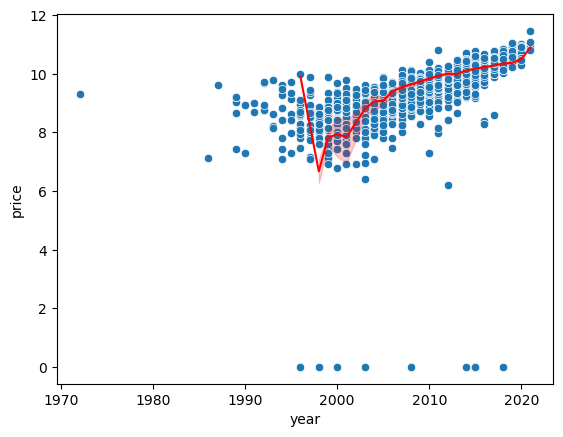

In [335]:
sns.scatterplot(x = X_1500_train.year, y = np.log(y_1500_train))

X_1500_test_sort = X_1500_test.sort_values('year')
sns.lineplot(x = X_1500_test_sort.year, y = np.log(linear_1500_30_features_model.predict(X_1500_test_sort)), color='red')

### Iteration Eleven: Linear Model, Only 1500 Car Model, 30 Features, Log Price
Introducing more features decreased MSE while demonstrating the same relative importance of features.

After closer examination of the results of the tenth iteration it was observed that **"price"** had a exponential relationship with **"year"**, the most important feature when holding car model as a constant. Given this, for the eleventh iteration of model training price will be transformed logarithmically to better fit against the data.

In [300]:
tt = TransformedTargetRegressor(
    regressor = LinearRegression(fit_intercept = False), 
    func = np.log, 
    inverse_func = np.exp
)

In [301]:
log_transform_pipe = Pipeline([
    ('preprocessing', model_manufacturer_removed_transformer),
    ('sfs', SequentialFeatureSelector(estimator = LinearRegression(), n_features_to_select = 30)),
    ('regressor', tt)
])

In [302]:
log_transform_param_dict = {
    'preprocessing__pipeline__poly__degree': list(range(1, 4)),
}

log_transform_grid = GridSearchCV(
    estimator = log_transform_pipe,
    param_grid = log_transform_param_dict,
    scoring = 'neg_mean_squared_error',
    cv = 5
)

In [303]:
log_transform_grid.fit(X_1500_train, y_1500_train)

/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metri

/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metri

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['condition',
                                                                          'cylinders',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['year',
                                                                          'odometer'])],
                                                          verbose_feature_names_out=False)),
                                       ('sfs',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  n_features_to_select=30)),
                                       ('regressor',
                                        TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=LinearRegression(fit_intercept=False)))]),
             param_grid={'preprocessing__pipeline__poly__degree': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [304]:
log_transform_model = log_transform_grid.best_estimator_
log_transform_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['condition', 'cylinders',
                                                   'drive', 'type',
                                                   'paint_color']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('sfs',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=30)),
                ('regressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=LinearRegression(fit_intercept=False)))])

In [305]:
# Evaluate MSE on test data
preds = log_transform_model.predict(X_1500_test)
mean_squared_error(preds, y_1500_test)

49392359.64188078

In [307]:
eleventh_model = log_transform_model.named_steps['regressor']
regressor = eleventh_model.regressor_
coef = regressor.coef_

# SFS returns index-named values as part of #get_feature_names_out, 
# so further processing is necessary to match feature names returned
feature_names = log_transform_model.named_steps['sfs'].get_feature_names_out()
cleaned_feature_names = [s.replace('x' , '') for s in feature_names]
feature_indices = [int(s) for s in cleaned_feature_names]

# Match index values with those from prepocessing step return
preprocessing_features = log_transform_model.named_steps['preprocessing'].get_feature_names_out()
log_transform_model_columns = list(preprocessing_features[i] for i in feature_indices)

pd.DataFrame({'features': log_transform_model_columns, 'coef': coef}).sort_values('coef', ascending = False, key=lambda cell: abs(cell))

,features,coef
9,drive_fwd,-1.051731e+12
8,drive_4wd,-1.051731e+12
10,drive_rwd,-1.051731e+12
11,type_SUV,6.115884e+11
13,type_pickup,6.115884e+11
15,type_truck,6.115884e+11
12,type_other,6.115884e+11
16,type_van,6.115884e+11
14,type_sedan,6.115884e+11
28,paint_color_yellow,5.140577e+11


In [308]:
r = permutation_importance(
    log_transform_model, 
    X_1500_test, 
    y_1500_test,
    n_repeats=30,
    random_state=42,
    scoring='neg_mean_squared_error'
)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_1500.columns[i]:<8}:  "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

year    :  169576762.196 +/- 10010456.598
condition:  14043277.811 +/- 2638445.466
cylinders:  8867537.450 +/- 2443189.303


<Axes: xlabel='year', ylabel='price'>

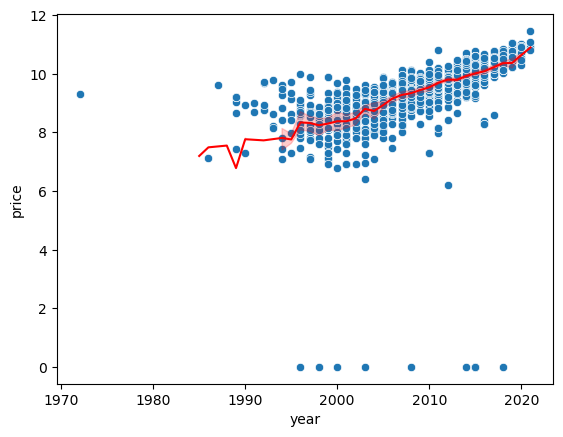

In [334]:
sns.scatterplot(x = X_1500_train.year, y = np.log(y_1500_train))

X_1500_test_sort = X_1500_test.sort_values('year')
sns.lineplot(x = X_1500_test_sort.year, y = np.log(log_transform_model.predict(X_1500_test_sort)), color='red')

In [316]:
y_1500_train[y_1500_train < 100]

102728    1
252688    1
96791     1
213357    1
93045     1
103275    1
102129    1
183261    1
101098    1
104207    1
367014    1
336345    1
38505     1
102393    1
Name: price, dtype: int64

<Axes: xlabel='year', ylabel='price'>

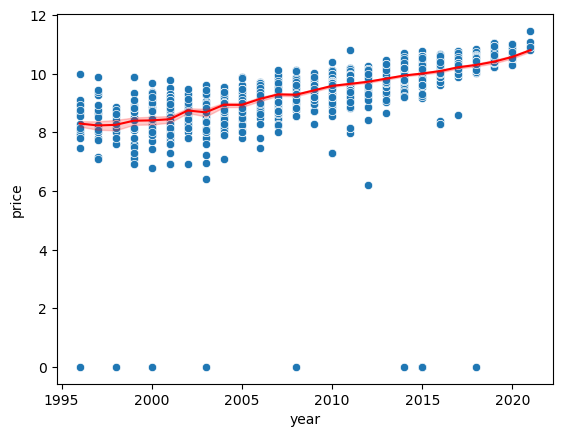

In [319]:
X_1500_past_1995 = X_1500_train[X_1500_train['year'] > 1995]

sns.scatterplot(x = X_1500_past_1995.year, y = np.log(y_1500_train))

X_1500_past_1995_sort = X_1500_past_1995.sort_values('year')
sns.lineplot(x = X_1500_past_1995_sort.year, y = np.log(log_transform_model.predict(X_1500_past_1995_sort)), color='red')

### Iteration Twelve: Remove Noise
Observing scatter plots from the 10th and 11th iterations, it was noticed that there was various noise that could be easily removed. Namely, that certain samples had price values of 1 and that the majority of samples were from 1995 onwards.

This iteration will observe performance removing these samples.

In [324]:
#Split the data
X_no_noise = only_1500_past_1995_df.drop('price', axis = 1)
y_no_noise = only_1500_past_1995_df['price']

X_no_noise_train, X_no_noise_test, y_no_noise_train, y_no_noise_test = train_test_split(X_no_noise, y_no_noise, test_size = 0.2, random_state = 42)

In [325]:
no_noise_pipe = Pipeline([
    ('preprocessing', model_manufacturer_removed_transformer),
    ('sfs', SequentialFeatureSelector(estimator = LinearRegression(), n_features_to_select = 30)),
    ('regressor', tt)
])

In [326]:
no_noise_param_dict = {
    'preprocessing__pipeline__poly__degree': list(range(1, 2)),
}

no_noise_grid = GridSearchCV(
    estimator = no_noise_pipe,
    param_grid = no_noise_param_dict,
    scoring = 'neg_mean_squared_error',
    cv = 5
)

In [328]:
no_noise_grid.fit(X_no_noise_train, y_no_noise_train)

/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metri

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['condition',
                                                                          'cylinders',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['year',
                                                                          'odometer'])],
                                                          verbose_feature_names_out=False)),
                                       ('sfs',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  n_features_to_select=30)),
                                       ('regressor',
                                        TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=LinearRegression(fit_intercept=False)))]),
             param_grid={'preprocessing__pipeline__poly__degree': [1]},
             scoring='neg_mean_squared_error')

In [329]:
no_noise_model = no_noise_grid.best_estimator_
no_noise_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['condition', 'cylinders',
                                                   'drive', 'type',
                                                   'paint_color']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('sfs',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=30)),
                ('regressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=LinearRegression(fit_intercept=False)))])

In [330]:
# Evaluate MSE on test data
preds = no_noise_model.predict(X_no_noise_test)
mean_squared_error(preds, y_no_noise_test)

25441509.56053641

In [338]:
twelth_model = no_noise_model.named_steps['regressor']
regressor = twelth_model.regressor_
coef = regressor.coef_

# SFS returns index-named values as part of #get_feature_names_out, 
# so further processing is necessary to match feature names returned
feature_names = no_noise_model.named_steps['sfs'].get_feature_names_out()
cleaned_feature_names = [s.replace('x' , '') for s in feature_names]
feature_indices = [int(s) for s in cleaned_feature_names]

# Match index values with those from prepocessing step return
preprocessing_features = no_noise_model.named_steps['preprocessing'].get_feature_names_out()
no_noise_model_columns = list(preprocessing_features[i] for i in feature_indices)

pd.DataFrame({'features': no_noise_model_columns, 'coef': coef}).sort_values('coef', ascending = False, key=lambda cell: abs(cell))

,features,coef
4,condition_new,3.457363e+12
0,condition_excellent,3.457363e+12
3,condition_like new,3.457363e+12
2,condition_good,3.457363e+12
1,condition_fair,3.457363e+12
5,condition_salvage,3.457363e+12
8,drive_fwd,-1.975636e+12
9,drive_rwd,-1.975636e+12
7,drive_4wd,-1.975636e+12
13,type_sedan,-9.878181e+11


In [333]:
r = permutation_importance(
    no_noise_model, 
    X_no_noise_test, 
    y_no_noise_test,
    n_repeats=30,
    random_state=42,
    scoring='neg_mean_squared_error'
)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_no_noise.columns[i]:<8}:  "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

year    :  130492026.833 +/- 8756502.700
odometer:  22920837.462 +/- 2417529.439
condition:  4807862.734 +/- 1702501.236
drive   :  3645884.901 +/- 878418.501
cylinders:  2916371.581 +/- 690726.245


<Axes: xlabel='year', ylabel='price'>

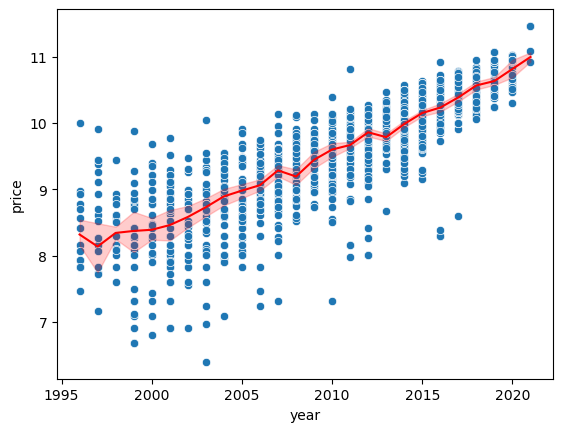

In [360]:
sns.scatterplot(x = X_no_noise_train.year, y = np.log(y_no_noise_train))

X_no_noise_test_sort = X_no_noise_test.sort_values('year')
sns.lineplot(x = X_no_noise_test_sort.year, y = np.log(no_noise_model.predict(X_no_noise_test_sort)), color='red')

### Iteration Thirteen: Expand to All Car Models
After deriving good results against the "1500" car model, I want to expand testing against a dataset that contains all car models to see if the results remain consistent across all models or if it would be necessary to train a model against each specific car model to see the same results.

In [343]:
#Split the data
X_model_removed = past_1995_df.drop(['manufacturer', 'model', 'price'], axis = 1)
y_model_removed = past_1995_df['price']

X_model_removed_train, X_model_removed_test, y_model_removed_train, y_model_removed_test = train_test_split(X_model_removed, y_model_removed, test_size = 0.2, random_state = 42)

In [347]:
model_removed_pipe = Pipeline([
    ('preprocessing', model_manufacturer_removed_transformer),
    ('sfs', SequentialFeatureSelector(estimator = LinearRegression(), n_features_to_select = 30)),
    ('regressor', tt)
])

In [348]:
model_removed_param_dict = {
    'preprocessing__pipeline__poly__degree': list(range(1, 2)),
}

model_removed_grid = GridSearchCV(
    estimator = model_removed_pipe,
    param_grid = model_removed_param_dict,
    scoring = 'neg_mean_squared_error',
    cv = 5
)

In [349]:
model_removed_grid.fit(X_model_removed_train, y_model_removed_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['condition',
                                                                          'cylinders',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['year',
                                                                          'odometer'])],
                                                          verbose_feature_names_out=False)),
                                       ('sfs',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  n_features_to_select=30)),
                                       ('regressor',
                                        TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=LinearRegression(fit_intercept=False)))]),
             param_grid={'preprocessing__pipeline__poly__degree': [1]},
             scoring='neg_mean_squared_error')

In [350]:
model_removed_model = model_removed_grid.best_estimator_
model_removed_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['condition', 'cylinders',
                                                   'drive', 'type',
                                                   'paint_color']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('sfs',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=30)),
                ('regressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=LinearRegression(fit_intercept=False)))])

In [352]:
# Evaluate MSE on test data
preds = model_removed_model.predict(X_model_removed_test)
mean_squared_error(preds, y_model_removed_test)

338903230.0404932

In [353]:
thirteenth_model = no_noise_model.named_steps['regressor']
regressor = thirteenth_model.regressor_
coef = regressor.coef_

# SFS returns index-named values as part of #get_feature_names_out, 
# so further processing is necessary to match feature names returned
feature_names = no_noise_model.named_steps['sfs'].get_feature_names_out()
cleaned_feature_names = [s.replace('x' , '') for s in feature_names]
feature_indices = [int(s) for s in cleaned_feature_names]

# Match index values with those from prepocessing step return
preprocessing_features = no_noise_model.named_steps['preprocessing'].get_feature_names_out()
model_removed_model_columns = list(preprocessing_features[i] for i in feature_indices)

pd.DataFrame({'features': model_removed_model_columns, 'coef': coef}).sort_values('coef', ascending = False, key=lambda cell: abs(cell))

,features,coef
4,condition_new,3.457363e+12
0,condition_excellent,3.457363e+12
3,condition_like new,3.457363e+12
2,condition_good,3.457363e+12
1,condition_fair,3.457363e+12
5,condition_salvage,3.457363e+12
8,drive_fwd,-1.975636e+12
9,drive_rwd,-1.975636e+12
7,drive_4wd,-1.975636e+12
13,type_sedan,-9.878181e+11


In [357]:
r = permutation_importance(
    model_removed_model, 
    X_model_removed_test, 
    y_model_removed_test,
    n_repeats=30,
    random_state=42,
    scoring='neg_mean_squared_error'
)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_model_removed.columns[i]:<8}:  "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

year    :  62225861.271 +/- 2217831.759
type    :  25291525.467 +/- 1453621.733
condition:  4447777.587 +/- 492426.824
odometer:  1820311.857 +/- 100623.607


<Axes: xlabel='year', ylabel='price'>

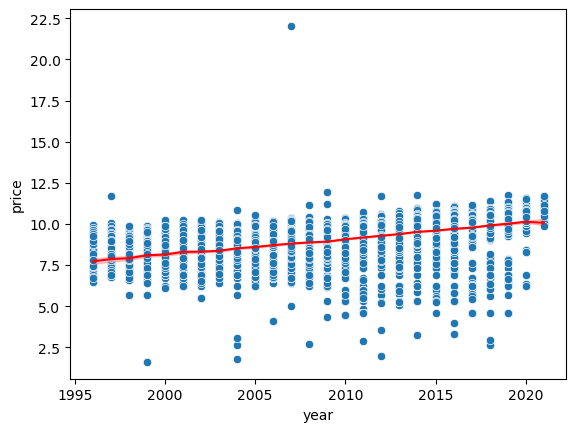

In [363]:
sns.scatterplot(x = X_model_removed_train.year, y = np.log(y_model_removed_train))

X_model_removed_test_sort = X_model_removed_test.sort_values('year')
sns.lineplot(x = X_model_removed_test_sort.year, y = np.log(model_removed_model.predict(X_model_removed_test_sort)), color='red')

### Iteration Fourteen: Multiple Models Per Car Model
Iteration fourteen demonstrated that while price had a general upward trend over time, the variance in price also increased. This is likely due to the introduction of car models to cater to a wider variety of customers.

Instead of trying to model behavior for all car models, we will likely see more accuracy if we create different models for each car model. To test this, 10 models will be created as part of this iteration using the top 10 most frequent car models.

In [378]:
top_10_car_models = past_1995_df.model.value_counts()[:10].index.to_list()
top_10_car_models

['1500',
 'f-150',
 'camry',
 'accord',
 'altima',
 'escape',
 'civic',
 'silverado',
 'explorer',
 '2500']

In [399]:
car_model_collection = {}

for model in top_10_car_models:
    car_model_collection[model] = {}
    
    current_df = past_1995_df[past_1995_df['model'] == model]
    
    car_model_collection[model]['X'] = current_df.drop(['manufacturer', 'model', 'price'], axis = 1)
    car_model_collection[model]['y'] = current_df['price']
    car_model_collection[model]['X_train'], car_model_collection[model]['X_test'], car_model_collection[model]['y_train'], car_model_collection[model]['y_test'] = train_test_split(car_model_collection[model]['X'], car_model_collection[model]['y'], test_size = 0.2, random_state = 42)
    
car_model_collection

{'1500': {'X':           year  condition    cylinders  odometer drive    type paint_color
  479     2014.0  excellent  8 cylinders  139029.0   4wd   truck       black
  734     2020.0   like new  8 cylinders    5622.0   rwd   truck       white
  1235    2015.0       good  8 cylinders  114800.0   4wd   truck      custom
  1236    2015.0       good  8 cylinders  119569.0   rwd   truck       white
  1322    2014.0  excellent  8 cylinders  139029.0   4wd   truck       black
  ...        ...        ...          ...       ...   ...     ...         ...
  426262  1999.0       fair  8 cylinders  137000.0   4wd  pickup      purple
  426348  2011.0  excellent  8 cylinders  124768.0   4wd  pickup        grey
  426419  2014.0       good  8 cylinders  200365.0   4wd   truck       white
  426633  2006.0  excellent  8 cylinders  137744.0   4wd  pickup        grey
  426769  2017.0       good  8 cylinders   61418.0   4wd   truck        grey
  
  [2491 rows x 7 columns],
  'y': 479       29950
  734     

In [400]:
multiple_model_pipe = Pipeline([
    ('preprocessing', model_manufacturer_removed_transformer),
    ('sfs', SequentialFeatureSelector(estimator = LinearRegression(), n_features_to_select = 25)),
    ('regressor', tt)
])

In [401]:
for model in car_model_collection:
    current_car_model = car_model_collection[model]
    X_train, y_train = current_car_model['X_train'], current_car_model['y_train']
    X_test, y_test = current_car_model['X_test'], current_car_model['y_test']
    
    current_car_model['model'] = multiple_model_pipe.fit(X_train, y_train)
    
    # Evaluate MSE on test data
    current_car_model['preds'] = current_car_model['model'].predict(X_test)
    current_car_model['mse'] = mean_squared_error(current_car_model['preds'], y_test)
    
    print(current_car_model['mse'])

26735209.05540061
23916590.695590403
3308237.4469729606
6259362.317427452
6291460.677787052
5875159.296924967
6988305.152997495
45635288.2343923
34761741.71501931
31368058.80099759


In [418]:
for model in car_model_collection:
    current_car_model = car_model_collection[model]
    current_model = current_car_model['model']
    X = current_car_model['X']
    X_test, y_test = current_car_model['X_test'], current_car_model['y_test']
    
    r = permutation_importance(
        current_model, 
        X_test, 
        y_test,
        n_repeats=30,
        random_state=42,
        scoring='neg_mean_squared_error'
    )

    print(model)
    
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{X.columns[i]:<8}:  "
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")
            
    print('\n')

1500
year    :  129316483.973 +/- 10443477.211
odometer:  12997917.767 +/- 3172811.982
drive   :  9223795.253 +/- 1863314.896
condition:  4525872.466 +/- 1808834.716


f-150
year    :  101594691.921 +/- 8210129.773
drive   :  10580579.065 +/- 2417676.423


camry
year    :  27528533.887 +/- 13141289.434
cylinders:  14069168.720 +/- 4588168.382


accord
year    :  15895496.512 +/- 6091244.475


altima
drive   :  689639456580728448.000 +/- 201426290030294656.000


escape
year    :  66170873.149 +/- 17576475.237


civic
year    :  382622.971 +/- 38376.619
odometer:  157440.067 +/- 16074.553


silverado
year    :  102190203.426 +/- 19357645.425


explorer
year    :  82809047.432 +/- 18562848.190


2500
year    :  149334242.885 +/- 14680077.525
condition:  14520166.463 +/- 5744266.940
type    :  2651155.055 +/- 927204.113




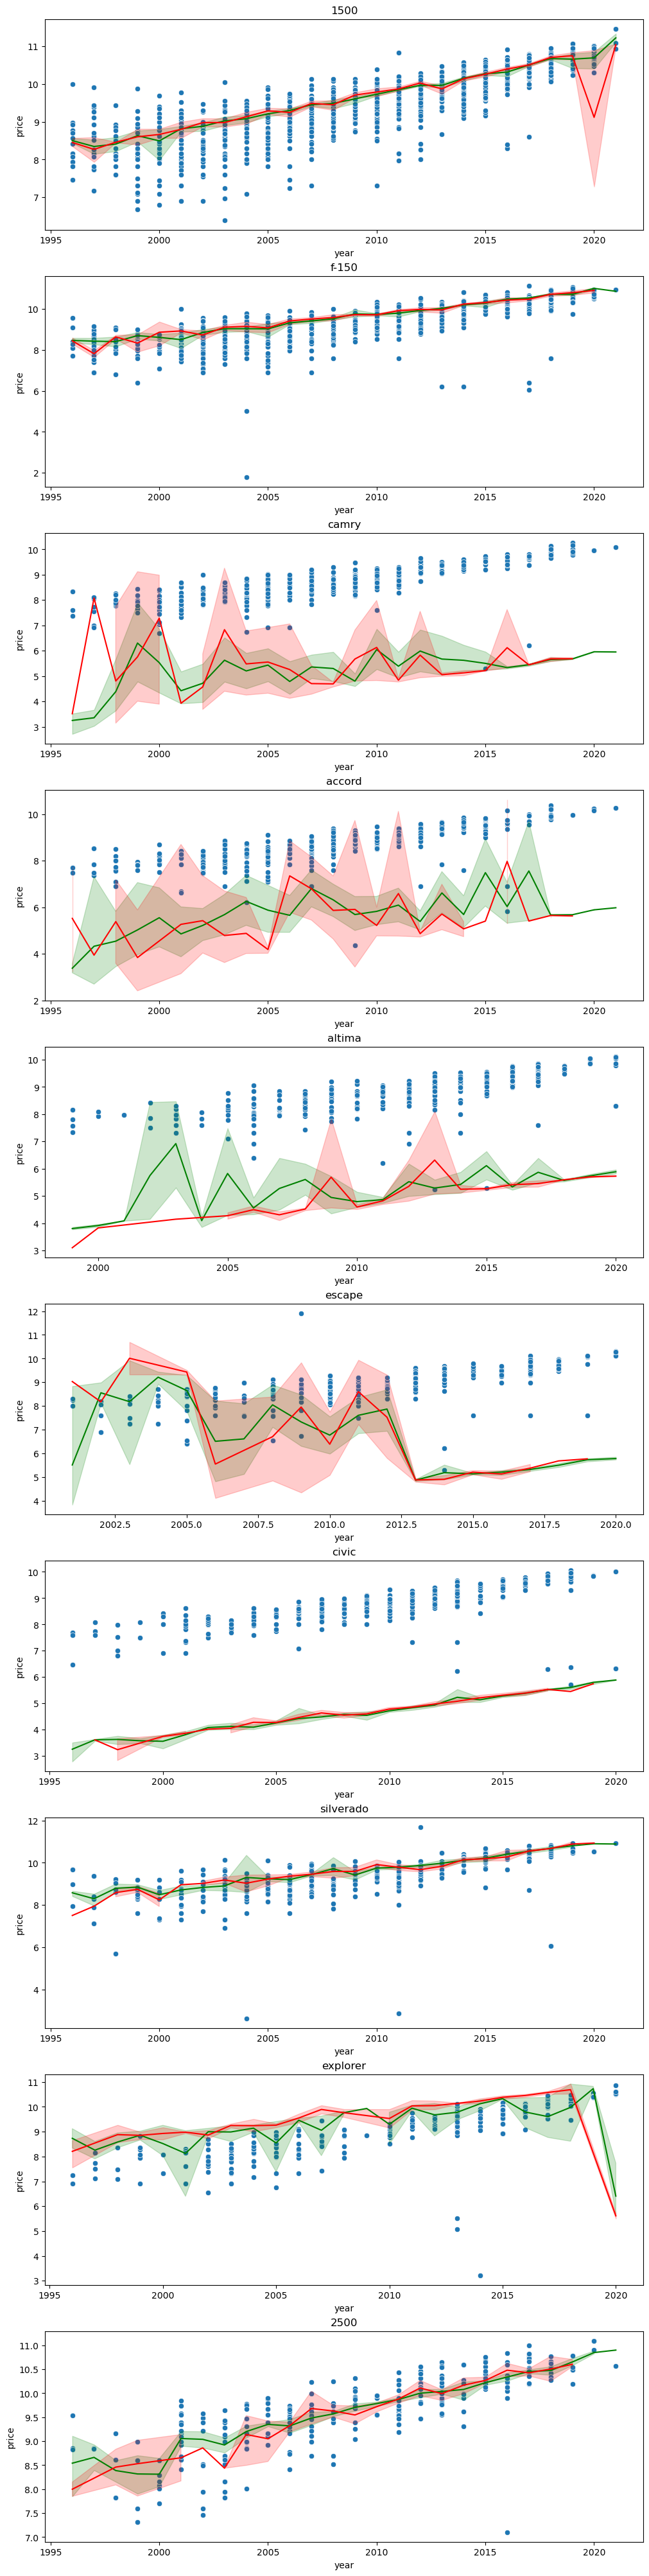

In [416]:
fig, axes = plt.subplots(len(top_10_car_models), 1, constrained_layout = True)
fig.set_size_inches(10, 40)
current_plot = 0

for model in car_model_collection:
    current_car_model = car_model_collection[model]
    current_model = current_car_model['model']
    X_train, y_train = current_car_model['X_train'], current_car_model['y_train']
    X_test = current_car_model['X_test']
    
    sns.scatterplot(x = X_train.year, y = np.log(y_train), ax = axes[current_plot]).set(title = model)
    
    X_train_sort = X_train.sort_values('year')
    sns.lineplot(x = X_train_sort.year, y = np.log(current_model.predict(X_train_sort)), color='green', ax = axes[current_plot])

    X_test_sort = X_test.sort_values('year')
    sns.lineplot(x = X_test_sort.year, y = np.log(current_model.predict(X_test_sort)), color='red', ax = axes[current_plot])
    
    current_plot += 1

### Modeling Summary
Through 14 iterations of model building a number of key factors have been identified in regards to what makes a quality model:
1. One of the largest drivers of price is the model of the car. This feature in and of itself encapsulates a number of other features. For example, a given model, while there is a certain amount of variation, will likely have the same general build, with the same drive and engine type.
2. After accounting for car model, the most effective approach to model building is to build at the car model level. That is, build a separate model for each car model. This makes sense given that different cars are likely to appeal to people for different reasons. Observations of scoring support this hypothesis in that models build against all car models (Iteration 13) returned an MSE of approximately **338903230**, whereas car model level models (Iteration 14) returned an MSE as low as **3308237**, approximately 1% the amount.
3. Modeling at the car model level, while there was variation of primary feature drivers from car to car, consistently year of the car played an important role in determining the price of the car. Plotting of models showed that in general all models demonstrated a slight upwards trend in price as the car year became more recent.
4. Further, plotting revealed that the relation between year and price was exponential. That is, that as the year of the car became more recent the price increased exponentially. Accounting for this by logging the price value when model building resulted in substantially improved model quality.

Overall, the best model(s) produced from model building come from Iteration 14, car model level models. With that being said, models that factor in car models into the training process also help to reveal which car models will return the best prices, and there is merit to doing a more thorough analysis of car models in future analysis cycles.

## Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

## Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.